# MC34063A Calculator

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [10]:
V_sat = 1.0 # Saturation voltage of Q1 
V_F = 0.60 # Forward drop on boost diode
V_in_min = 4.5 # V
V_out = 9 # V
I_out_max = 0.070 # A
V_ripple_pp = 0.1 # V

In [11]:
D = (V_out + V_F - V_in_min) / (V_in_min - V_sat) # D = t_on / t_off
P = lambda f: 1 / float(f) # P = (t_on + t_off)
t_off = lambda f: P(f) / (D + 1)
t_on = lambda f: P(f) - t_off(f)

In [12]:
v = 4.0e-5
C_T = lambda f: t_on(f) * v
I_pk_switch = 2 * I_out_max * (D+1)
R_sc = 0.33 / I_pk_switch
L_min = lambda f: (V_in_min - V_sat) / I_pk_switch * t_on(f)
C_O = lambda f: 9 * (I_out_max * t_on(f)) / V_ripple_pp

In [13]:
print('D={}'.format(D))
print('I_pk_switch={}'.format(I_pk_switch))
print('R_sc={}'.format(R_sc))
f=30000
print('C_T({})={}pF'.format(f, C_T(f)/1e-12))
print('L_min({})={}uH'.format(f, L_min(f)/1e-6))
print('C_O({})={}uF'.format(f, C_O(f)/1e-6))

D=1.457142857142857
I_pk_switch=0.34400000000000003
R_sc=0.9593023255813953
C_T(30000)=790.6976744186047pF
L_min(30000)=201.12222823147647uH
C_O(30000)=124.53488372093024uF


In [7]:
vP = numpy.vectorize(P)
vt_off = numpy.vectorize(t_off)
vt_on = numpy.vectorize(t_on)
vC_T = numpy.vectorize(C_T)
vL_min = numpy.vectorize(L_min)
vC_O = numpy.vectorize(C_O)

In [8]:
f = numpy.linspace(start=5000.0, stop=40000, num=4000)

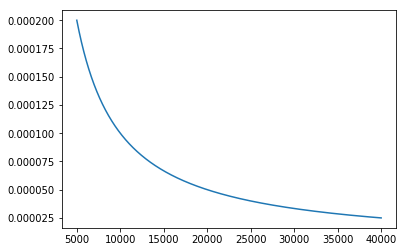

In [9]:
plot(f, vP(f))

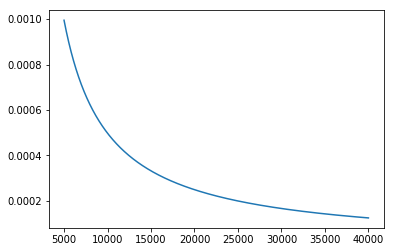

In [10]:
plot(f, vL_min(f))

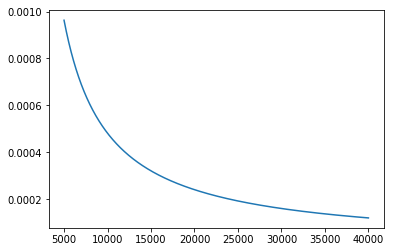

In [11]:
plot(f, vC_O(f))

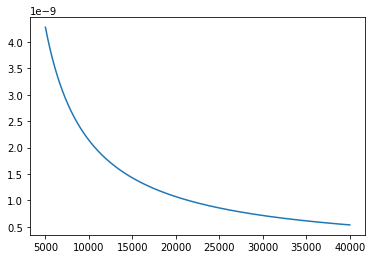

In [12]:
plot(f, vC_T(f))

In [14]:
V_D = 0.4
R1 = 2700
R2 = R1 * ((V_out-V_D)/1.25 - 1)
print('R2={}Ohm'.format(R2))

R2=15876.0Ohm


In [14]:
1/50e-6

20000.0